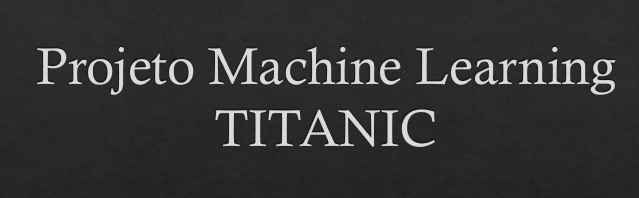


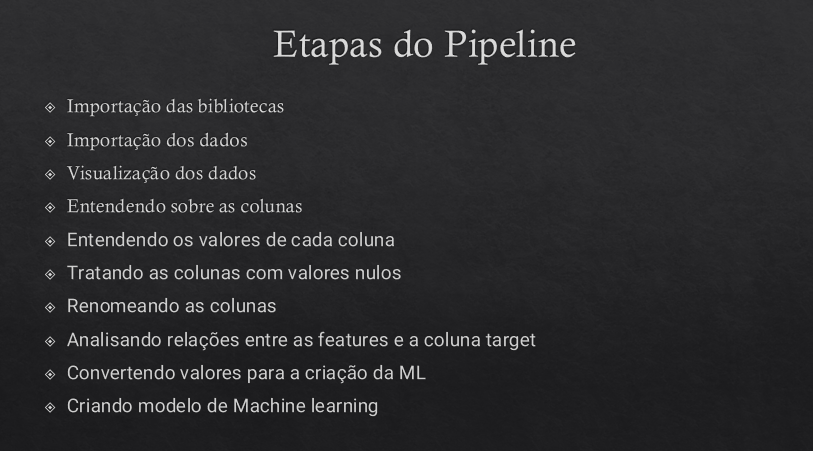

# Importação das bibliotecas

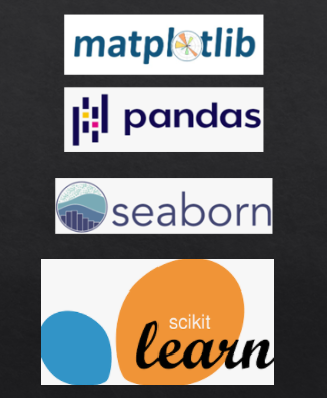

In [ ]:
import pandas as pd
# pandas - Utilizado para manipulação e análise dos dados 
import seaborn as sns
#seaborn - Utilizado para plotagem de gráficos 
import matplotlib.pyplot as plt
# matplotlib - Utilizado para plotagem dos graficos 
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier -  Utilizado para a criação do modelo de ML
from sklearn.model_selection import train_test_split
# para fazer a separação de uma parte dos dados para treino e outra para teste 
from sklearn.metrics import accuracy_score
# Utilizado para ver a precisão do modelo 
from sklearn.metrics import plot_confusion_matrix
# Utilizado para gerar o grafico de uma matriz de confusão do modelo 
from sklearn.model_selection import GridSearchCV
# Utilizado para encontrar os melhores valores para os hiperparâmetros
from sklearn.tree import DecisionTreeClassifier
# Modelo de arvore de decisão para ML
from sklearn.model_selection import cross_validate
# Utilizado para fazer validação cruzada do modelo 
from sklearn.model_selection import GroupKFold
# Utilizado para separar por grupos na hora de treinar o modelo 

# Importação dos dados

In [ ]:
dataset=pd.read_csv('train.csv')
validação=pd.read_csv('test.csv')
# train.csv e test.csv são os datasets utilizados 
#pd.read_csv é a função do pandas utilizada para ler e armazenar dataset
# dataset e validação são os nomes dados as variáveis que estão asmazenando os datasets 


# Visualizando o dataset

In [ ]:
dataset.head(1)
# visualização dos dados 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
validação.head(1)
# visualização dos dados 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


# Entendendo sobre as colunas

In [ ]:
dataset.shape
# visualização do tamanho do dataset 

(891, 12)

In [ ]:
validação.shape
# visualização do tamanho do dataset 

(418, 11)

In [ ]:
pd.DataFrame(dataset.columns).T
# verificação das colunas contidas nos dados

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
pd.DataFrame(validação.columns).T
# verificação das colunas contidas nos dados

,0,1,2,3,4,5,6,7,8,9,10
0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked



Após pesquisas foram encontrados o que significa cada coluna do dataset


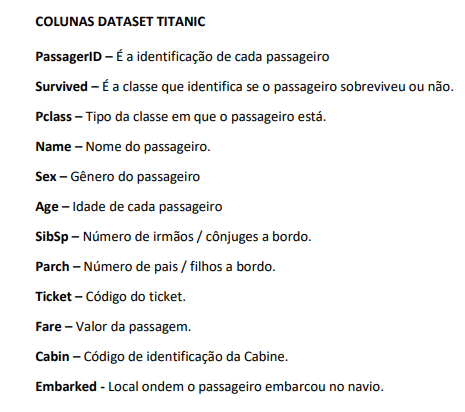

# Entendendo os valores de cada coluna

In [ ]:
dataset.describe().T
# Função que retorna os valores estatisticos do dataset

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
validação.describe().T
# Função que retorna os valores estatisticos do dataset de validação

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
dataset.info()
#Função que retorna informações do dataset como: classe,tamanho,
#quantidade de registro não nulos e tipo de cada coluna



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
validação.info()
#Função que retorna informações como: classe,tamanho,
#quantidade de registro não nulos e tipo de cada coluna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
survived_Unicos=pd.DataFrame(dataset['Survived'].unique())
survived_Unicos.columns=['Sobreviveu']
survived_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna Survived dos dados de treino

,0,1
Sobreviveu,0,1


In [ ]:
Pclass_Unicos=pd.DataFrame(dataset['Pclass'].unique())
Pclass_Unicos.columns=['Classe']
Pclass_Unicos=Pclass_Unicos.sort_values(['Classe'])
Pclass_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna Pclass dos dados de treino

,1,2,0
Classe,1,2,3


In [ ]:
Sex_Unicos=pd.DataFrame(dataset['Sex'].unique())
Sex_Unicos.columns=['Gênero']
Sex_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna Sex dos dados de treino

,0,1
Gênero,male,female


In [ ]:
SibSp_Unicos=pd.DataFrame(dataset['SibSp'].unique())
SibSp_Unicos.columns=['Filhos/Conjuges']
SibSp_Unicos=SibSp_Unicos.sort_values(['Filhos/Conjuges'])
SibSp_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna SibSp dos dados de treino

,1,0,4,2,3,5,6
Filhos/Conjuges,0,1,2,3,4,5,8


In [ ]:
Parch_Unicos=pd.DataFrame(dataset['Parch'].unique())
Parch_Unicos.columns=['Pais/Filhos']
Parch_Unicos=Parch_Unicos.sort_values(['Pais/Filhos'])
Parch_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna SibSp dos dados de treino

,0,1,2,4,5,3,6
Pais/Filhos,0,1,2,3,4,5,6


In [ ]:
Embarked_Unicos=pd.DataFrame(dataset['Embarked'].unique())
Embarked_Unicos.columns=['Embarcou']
Embarked_Unicos=Embarked_Unicos.sort_values(['Embarcou'])
Embarked_Unicos.T
# Criado uma variável para armazenar os valores unicos da coluna Embarked dos dados de treino

,1,2,0,3
Embarcou,C,Q,S,NaN


Descrição dos atributos de cada coluna 

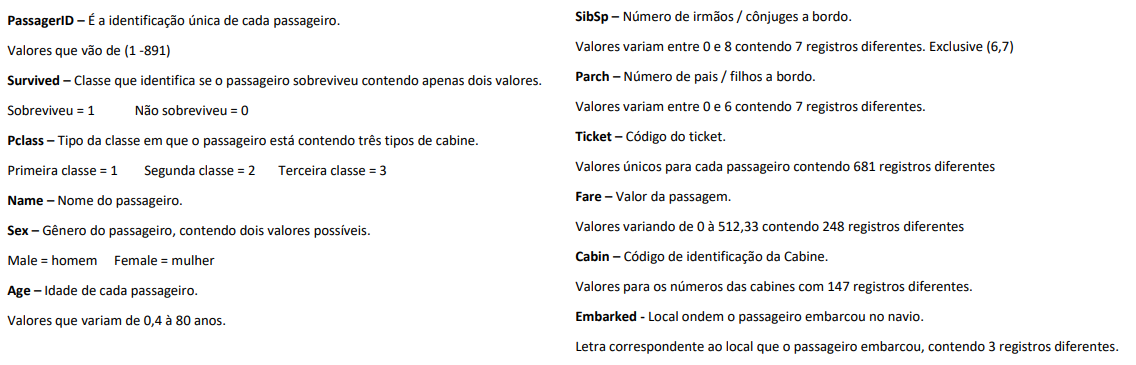

# Tratando as colunas com valores nulos 

In [ ]:
dados_nulos=pd.DataFrame(dataset.isna().sum())
dados_nulos.T
# verificando valores nulos 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


Identificado algumas colunas com valores nulos

age = 177

Cabin = 687

Embarked = 2

In [ ]:
test_nulos=pd.DataFrame(validação.isna().sum())
test_nulos.T
# verificando valores nulos 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,86,0,0,0,1,327,0


Identificado algumas colunas com valores nulos

age = 86

Fare = 1

Cabin = 327



In [ ]:
dataset['Age'].fillna(value=(dataset['Age'].mean()),inplace=True)
validação['Age'].fillna(value=(validação['Age'].mean()),inplace=True)
# para a coluna Age foi utilizado a media para preencher os valores nulos

In [ ]:
dataset['Embarked'].mode()
# Descoberto o valor que mais aparece na coluna Embarked 

0    S
dtype: object

In [ ]:
dataset['Embarked'].fillna(value=('S'),inplace=True)
# Para os valores faltantes da coluna Embarked foi utilizado a moda para preencher a coluna 

In [ ]:
validação['Fare'].fillna(value=(validação['Fare'].mean()),inplace=True)
# para a coluna Fare foi utilizado a media para preencher os valores nulos

In [ ]:
dataset.drop(columns=['Cabin'],inplace=True)
validação.drop(columns=['Cabin'],inplace=True)
# Na coluna Cabin foi identificado um valor muito alto de registros nulos
# portanto foi optado por remover a coluna do dataset 

# Renomeando as colunas

In [ ]:
dataset.columns=['ID','Sobreviveu','Classe','Nome','Gênero','Idade','Irmão/Cônjuge','Pai/filho','Ticket','Preço','Embarcou']
pd.DataFrame(dataset.columns).T
# Renomenando as colunas do dataset de treino 

,0,1,2,3,4,5,6,7,8,9,10
0,ID,Sobreviveu,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Ticket,Preço,Embarcou


In [ ]:
validação.columns=['ID','Classe','Nome','Gênero','Idade','Irmão/Cônjuge','Pai/filho','Ticket','Preço','Embarcou']
pd.DataFrame(validação.columns).T
# Renomenando as colunas do dataset de teste 

,0,1,2,3,4,5,6,7,8,9
0,ID,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Ticket,Preço,Embarcou


# Analisando relações entre as features e a coluna target 

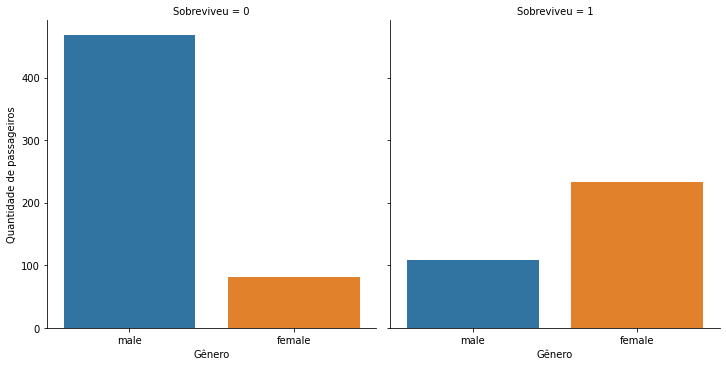

In [ ]:
sns.catplot(x='Gênero',col='Sobreviveu',kind='count',data=dataset).set_ylabels('Quantidade de passageiros');
#Utilizado seaborn para criar grafico de barras 


**Verificado que o maior numero de sobreviventes se encontra no gênero feminino,
e a quantidade de mortes do gênero masculino supera a quantidade de sobreviventes do mesmo.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


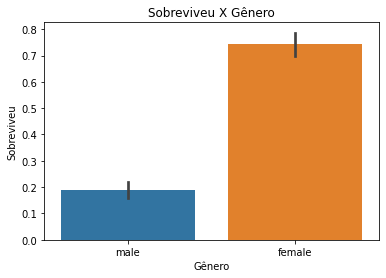

In [ ]:
sns.barplot('Gênero','Sobreviveu',data=dataset).set_title('Sobreviveu X Gênero');
# Grafico de barras mostrando a porcentagem de sobrevivencia por gênero 


**Aproximadamente 75% das mulheres sobreviveram**

**Aproximadamente 20% dos homens sobreviveram**

In [ ]:
grupo_idade=[]
for i in dataset['Idade']:
  if i < 14:
    grupo_idade.append('Criança')
  elif i >=14 and i <= 17:
    grupo_idade.append('Adolescente')
  elif i>=18 and i <=50:
    grupo_idade.append('Adulto')
  else:
    grupo_idade.append('Idoso')
# Criado grupos de idade para ter mais uma feature no dataset e identificarmos
# por categorias de idade os sobreviventes 

In [ ]:
grupo_idade_validação=[]
for i in validação['Idade']:
  if i < 14:
    grupo_idade_validação.append('Criança')
  elif i >=14 and i <= 17:
    grupo_idade_validação.append('Adolescente')
  elif i>=18 and i <=50:
   grupo_idade_validação.append('Adulto')
  else:
    grupo_idade_validação.append('Idoso')
## Criado grupos de idade para ter mais uma feature no dataset de validação e identificarmos
# por categorias de idade os sobreviventes 

In [ ]:
dataset['Grupo_Idade']=grupo_idade
dataset.head(2)
# Criado uma nova coluna Grupo_Idade para criarmos visualizações de qual grupo de pessoas mais sobreviveu ou não 

,ID,Sobreviveu,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Ticket,Preço,Embarcou,Grupo_Idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto


In [ ]:
validação['Grupo_Idade']=grupo_idade_validação
validação.head(2)
# Criado uma nova coluna Grupo_Idade para criarmos visualizações de qual grupo de pessoas mais sobreviveu ou não 

,ID,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Ticket,Preço,Embarcou,Grupo_Idade
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Adulto
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adulto


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


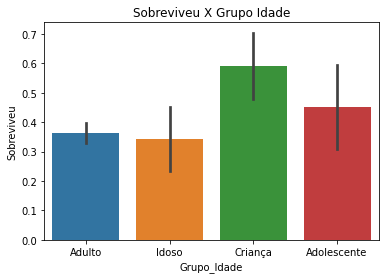

In [ ]:
sns.barplot('Grupo_Idade','Sobreviveu',data=dataset).set_title('Sobreviveu X Grupo Idade');
# Grafico de barras para verificar qual grupo de pessoas mais sobreviveu 


**Identificado qual grupo de pessoas mais sobreviveu**

**1- Criança**

**2-Adolescente**

**3- Adulto**

**4- Idoso**

**Podemos identificar uma escala decrescente dos grupos**
**quanto mais novo o grupo mais sobreviventes, e quanto** **mais velho menos sobreviventes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


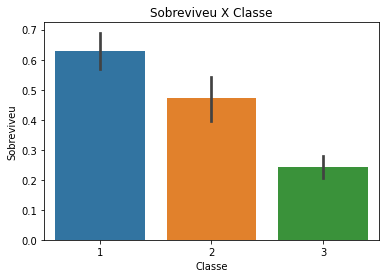

In [ ]:
sns.barplot('Classe','Sobreviveu',data=dataset).set_title('Sobreviveu X Classe');
# Grafico de barras para verificar quantidade de pessoas que mais sobreviveu por classe 


**Identificado a porcentagem de sobreviventes por Classes,notando-se que quanto melhor a classe em que se encontra o passageiro maior é a probabilidade de sobrevivência**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


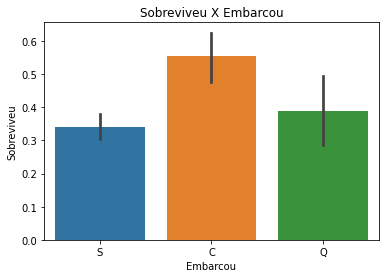

In [ ]:
sns.barplot('Embarcou','Sobreviveu',data=dataset).set_title('Sobreviveu X Embarcou');
# Grafico de barras para verificar quantidade de pessoas que mais sobreviveu por local em que embarcou  


**Identificado a porcentagem de sobreviventes por cidade em que embarcaram S - Southampton, C - Cherbourg e Q - Queenstown**

**Numero maior de sobreviventes que embarcaram na cidade de Cherbourg**

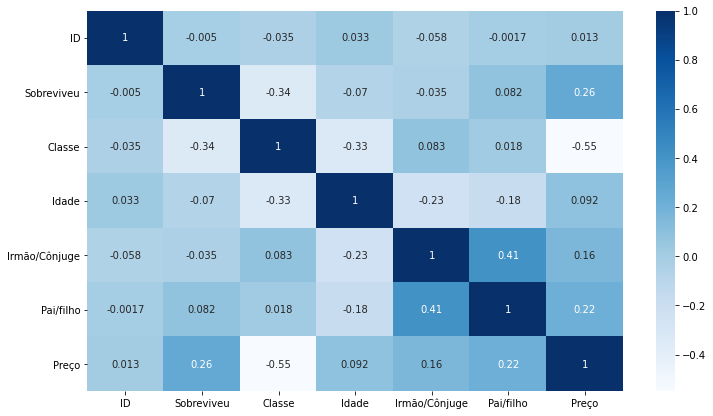

In [ ]:
plt.figure(figsize=(12,7))
correlação = dataset.corr()
sns.heatmap(correlação, cmap = 'Blues', annot = True);
# Mapa de calor para verificar relação entre as variaveis 


**Maiores correlações de features com sobreviventes são: Preço e Classe sendo a classe uma correlação negativa**

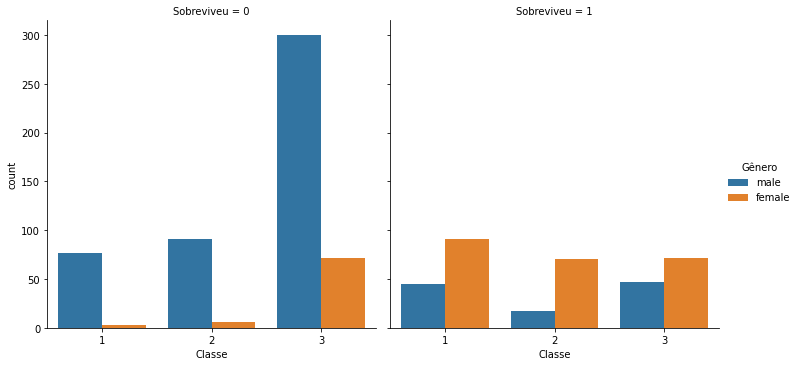

In [ ]:
sns.catplot(x='Classe',hue='Gênero',col='Sobreviveu',kind='count',data=dataset);
# Grafico de barras comparando quem sobreviveu ou não por genero e classe 

**Identificado um maior numero de sobreviventes do gênero feminino na primeira classe, enquanto que no gênero masculino sobreviveu uma quantidade semelhante tanto na primeira quanto na terceira classe**

**OBS - Apesar da quantidade de sobreviente masculinos em ambas as classes serem semelhantes, deve-se levar em conta que a terceira classe contava com um numero maior de passageiros, onde esta tem um numero bem elevado de não sobreviventes do gênero masculino**

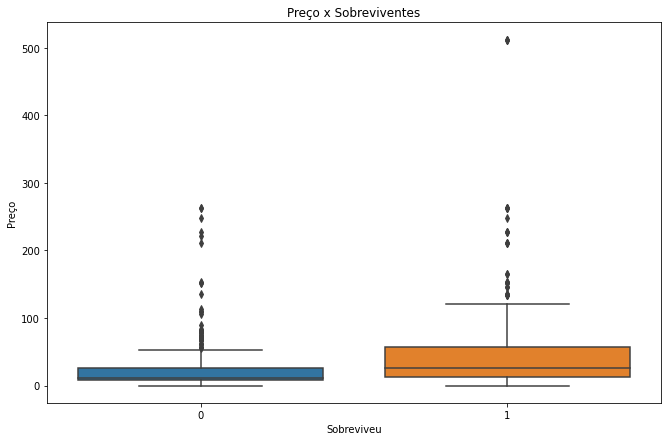

In [ ]:
plt.figure(figsize=(11,7))
plt.title('Preço x Sobreviventes')
sns.boxplot(x='Sobreviveu', y = 'Preço', data = dataset);

**Encontrado valores outliers porem não removidos do dataset.**

**Identificado que os passageiros que pagaram valores maiores em suas passagens foram os que mais sobreviveram**

# Convertendo valores para a criação da ML

In [ ]:
 dataset['Preço'] = dataset['Preço'].astype(int)
 validação['Preço'] = validação['Preço'].astype(int)
 #Convertendo a coluna preço para o tipo inteiro 

In [ ]:
genero = {"male": 0, "female": 1}
dataset['Gênero']= dataset['Gênero'].map(genero)
validação['Gênero']= validação['Gênero'].map(genero)
# Convertendo a coluna Gênero para o tipo inteiro 

In [ ]:
dataset.drop(columns=['Ticket'],inplace=True)
#excluindo a coluna ticket 

In [ ]:
validação.drop(columns=['Ticket'],inplace=True)

In [ ]:
grupoidade={'Criança':1,'Adolescente':2,'Adulto':3,'Idoso':4}
dataset['Grupo_Idade']=dataset['Grupo_Idade'].map(grupoidade)
# Convertendo a coluna Grupo_Idade para o tipo inteiro

In [ ]:
validação['Grupo_Idade']=validação['Grupo_Idade'].map(grupoidade)

In [ ]:
embarcado = {"S": 0, "C": 1, "Q": 2}
dataset['Embarcou'] = dataset['Embarcou'].map(embarcado)

In [ ]:
validação['Embarcou'] = validação['Embarcou'].map(embarcado)
# Convertendo a coluna Embarcou para o tipo inteiro

In [ ]:
dataset.head(2)

,ID,Sobreviveu,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Preço,Embarcou,Grupo_Idade
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71,1,3


In [ ]:
validação.head(2)

,ID,Classe,Nome,Gênero,Idade,Irmão/Cônjuge,Pai/filho,Preço,Embarcou,Grupo_Idade
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7,0,3


# Fazendo a validação do Modelo 

In [ ]:
colunas=dataset[['ID','Sobreviveu','Nome']]
colunas_test=dataset[['ID','Nome']]
X=dataset.drop(columns=colunas)
y=dataset['Sobreviveu']
X_validate=validação.drop(columns=colunas_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#criado as variaveis com os valores das features e da target  
# feito o split no dataset para criar uma base de treino e outra de teste com 20% de dados para testes

In [ ]:
cv=GroupKFold(n_splits=10)
#criado uma divisão com 10 grupos nos dados 
modelo = DecisionTreeClassifier()
# criado um modelo de arvore de decisão
resultados=cross_validate(modelo,X,y,cv=cv,groups=dataset.Idade)
# Criado a validação cruzada utilizando o modelo o x e o y do dataset todo e definido a coluna idade para ser o grupo 
media =resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print(f'accuracy = [{((media - 2* desvio_padrao)*100).round(2)} , {((media+2*desvio_padrao)*100).round(2)}]')
# Encontrado o periodo em que se encontra a precisão do modelo 

accuracy = [64.35 , 88.45]


In [ ]:
espaco_de_parametros = {"max_depth" : [3, 5,10,30],
                        "min_samples_split" : [32, 64, 128],
                        "min_samples_leaf" : [32, 64, 128],
                        "criterion" : ["gini", "entropy"],
                        "max_leaf_nodes":[5,10,30]}
cv=GroupKFold(n_splits=5)
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = cv)
busca.fit(X, y, groups = dataset.Idade)
resultados = pd.DataFrame(busca.cv_results_)
busca.best_estimator_
#criado valores para se testar em cada parametro
#escolhido quantos grupos vão ser utilizados 
#criado o gridsearch
#realizado o treinamento com os valores para cada parametro
#retornado o melhor modelo encontrado dentro desses parametros 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Criando o modelo de Machine Learning com os melhores parâmetros

In [ ]:
modelo_ajustado = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
modelo_ajustado.fit (X_train, y_train)
# Treinado um novo modelo de ML com a arvore de decisão com os parametros encontrados como adequados 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = modelo_ajustado.predict(X_validate)


In [ ]:
accuracy =(modelo_ajustado.score(X_train,y_train)*100).round(2)
print(accuracy.round(2), "%")

81.32 %


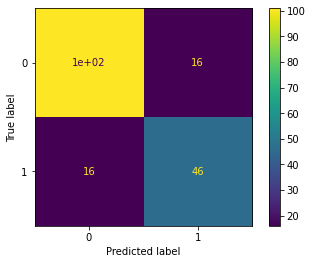

In [ ]:

plot_confusion_matrix(modelo_ajustado, X_test, y_test);
# matriz de confusão para visualizar quantos dados a ML errou ou acertou comparando os valores corretos com os valores previstos

In [ ]:
submission = pd.DataFrame({
        "PassengerId": validação["ID"],
        "Survived": predictions
    })
submission.to_csv('submission.csv', index=False)

# Descrição das funções utilizadas no projeto

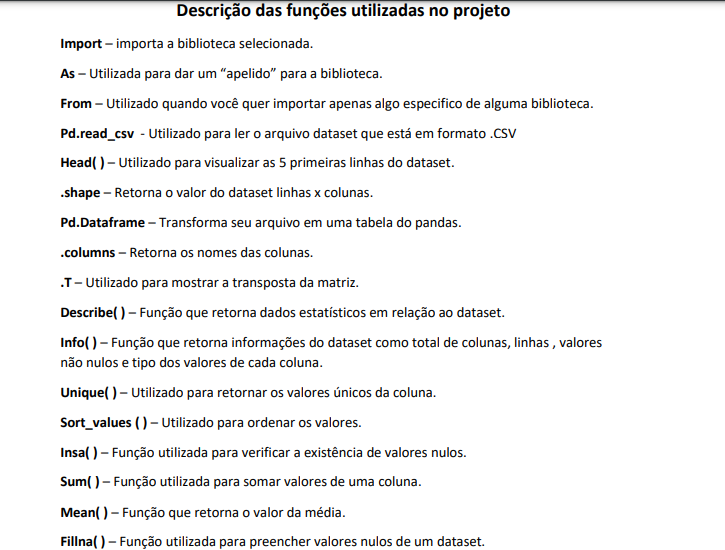

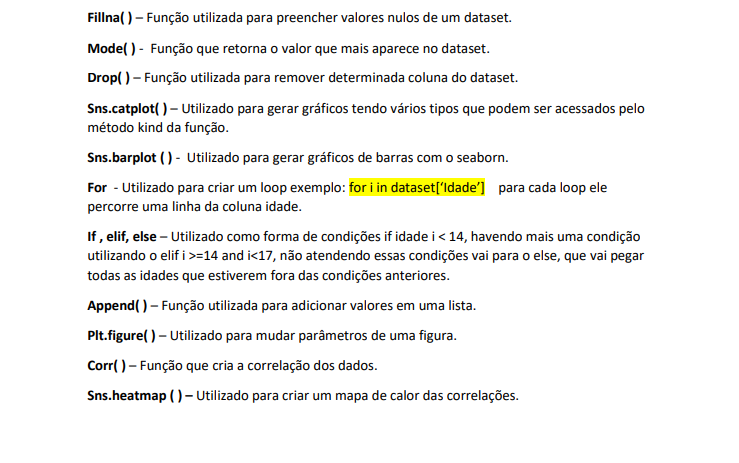

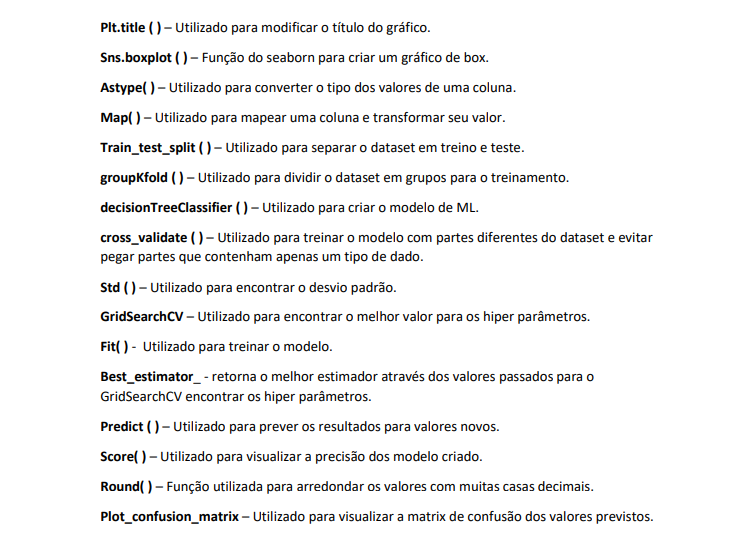

# Desenho da arvore de decisão

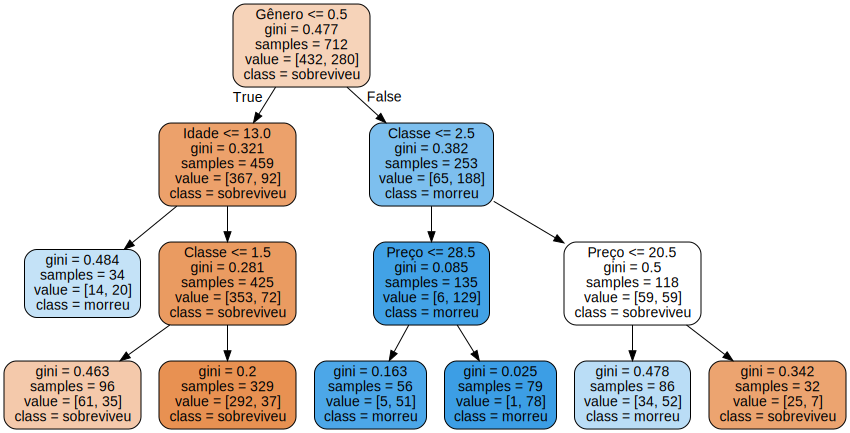

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
arvore = export_graphviz(modelo_ajustado, out_file=None, filled=True, rounded=True, class_names=["sobreviveu", "morreu"], feature_names =  X.columns)
grafico = graphviz.Source(arvore)
grafico